# Jupiter Notebook for Scenario 11
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter
start_i=perf_counter()

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-11-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(556478, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 556217, 1: 261})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    556478
srcIP                  15205
srcPrt                 58826
dstIP                   9685
dstPrt                   675
flowduration          411532
total_fpackets           754
total_bpackets          1028
total_fpktl            12662
total_bpktl            41013
min_fpktl                155
min_bpktl                504
max_fpktl               1366
max_bpktl               1053
mean_fpktl             40188
mean_bpktl             51916
std_fpktl              91695
std_bpktl              65622
total_fipt            248666
total_bipt            218260
min_fipt               95415
min_bipt               35760
max_fipt              235799
max_bipt              180903
mean_fipt             235038
mean_bipt             207850
std_fipt              221793
std_bipt              206512
fpsh_cnt                 149
bpsh_cnt                 504
furg_cnt                   1
burg_cnt                   1
total_fhlen             4093
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(556478, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(556478, 49)
(553430, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,49425,80,5.330176,25,30,2995,34275,66,66,516,1434,119.800003,1142.500000,148.696564,542.507890,5.330171,5.309903,0.000865,0.000007,4.783427,4.860974,0.222090,0.183100,0.972401,0.900639,3,10,0,0,800,960,4.690277,5.628332,10.318609,6992.264648,677.636364,657.270813,0.186642,0.905723,2,0,0,55,0,0,0,11.444074,0
1,TCP,49420,80,3.373492,98,198,7373,275691,60,66,526,1434,75.234695,1392.378784,64.750085,219.551855,3.373492,3.260409,0.000645,0.000007,2.707926,2.765924,0.034778,0.016550,0.274669,0.197082,2,66,0,0,3124,6336,29.050016,58.692890,87.742905,83908.304688,956.297297,647.368469,0.011516,0.157800,2,0,1,295,0,0,0,37.391972,0
2,TCP,49424,80,5.314620,22,29,3764,32911,66,66,537,1434,171.090912,1134.862061,198.355357,546.003387,5.314620,5.314599,0.000986,0.000008,4.793556,4.876292,0.253077,0.189807,1.041010,0.919354,5,8,0,0,704,928,4.139524,5.456646,9.596170,6900.775391,719.117647,644.878052,0.204388,0.941021,2,0,0,51,0,0,0,8.743624,0
3,TCP,62676,80,10.007152,25,30,2147,38518,66,66,563,1434,85.879997,1283.933350,99.399997,419.238876,10.007138,9.997345,0.001918,0.000006,5.004730,4.980878,0.416964,0.344736,1.379174,1.274558,1,13,0,0,800,960,2.498213,2.997856,5.496069,4063.593750,739.363636,679.145874,0.274507,1.123926,2,0,0,55,0,0,0,17.940382,0
4,TCP,49421,80,5.309026,25,37,2116,48472,66,66,532,1434,84.639999,1310.054077,93.199996,382.904824,5.309026,5.309011,0.000883,0.000006,4.750392,4.669868,0.221209,0.147473,0.965569,0.776987,1,13,0,0,800,1184,4.708962,6.969263,11.678225,9528.677734,815.935484,676.177124,0.165709,0.840417,2,0,0,62,0,0,0,22.907372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556471,UDP,43580,53,0.000000,1,0,73,0,73,0,73,0,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,39,0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
556472,UDP,43618,53,0.184316,1,1,78,137,78,137,78,137,78.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,103,5.425460,5.425460,10.850921,1166.473999,107.500000,41.719299,0.184316,0.000000,0,0,0,0,0,0,0,1.756410,0
556473,UDP,43583,53,0.000000,1,0,72,0,72,0,72,0,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,0,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
556475,UDP,43587,53,0.000000,1,0,72,0,72,0,72,0,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,0,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 553173 of 553430 (100.0%)
> Class 1 : 257 of 553430 (0.0%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((442744, 48), (110686, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
360095,0.00009,0.000000e+00,0.000003,5.565753,3,3,224,1213,72,147,76,533,74.666664,404.333344,2.309401,222.857210,5.467604,5.465035,0.000066,0.000366,5.467538,5.464669,2.733802,2.732518,3.866086,3.863846,0,0,0,0,122,1111,0.539011,0.539011,1.078021,2.581861e+02,239.500000,229.068329,1.133354,2.423390,0,0,0,0,0,0,0,5.415179
519307,0.00009,1.388756e-10,0.000003,0.346718,1,1,74,74,74,74,74,74,74.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,40,2.884190,2.884190,5.768379,4.268601e+02,74.000000,0.000000,0.346718,0.000000,0,0,0,0,0,0,0,1.000000
267399,0.00009,1.122539e-06,0.000003,0.353651,1,1,67,67,67,67,67,67,67.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,33,33,2.827648,2.827648,5.655296,3.789048e+02,67.000000,0.000000,0.353651,0.000000,0,0,0,0,0,0,0,1.000000
278703,0.00009,4.136054e-07,0.000003,0.121386,1,1,87,458,87,458,87,458,87.000000,458.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,53,424,8.238179,8.238179,16.476358,4.489808e+03,272.500000,262.336609,0.121386,0.000000,0,0,0,0,0,0,0,5.264368
165020,0.00113,2.789375e-09,0.000134,16.283991,9,10,1298,6100,60,54,436,1434,144.222229,610.000000,165.434107,640.384780,16.283980,16.283965,0.205139,0.000008,7.884252,8.960174,2.035497,1.809329,2.918911,3.135475,2,2,0,0,192,212,0.552690,0.614100,1.166790,4.543112e+02,389.368421,523.738403,1.143414,2.270825,2,2,0,18,0,0,0,4.699538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110301,0.00113,1.155229e-16,0.000134,0.101769,5,5,736,509,60,54,494,285,147.199997,101.800003,193.869023,102.470483,0.101763,0.101745,0.002004,0.000064,0.055367,0.053541,0.025441,0.025436,0.023072,0.027463,1,1,0,0,108,108,49.130890,49.130890,98.261780,1.223359e+04,124.500000,148.134506,0.011737,0.019236,2,2,0,9,0,0,0,0.691576
259756,0.00009,3.038467e-06,0.000003,0.209169,1,1,72,72,72,72,72,72,72.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,4.780820,4.780820,9.561640,6.884380e+02,72.000000,0.000000,0.209169,0.000000,0,0,0,0,0,0,0,1.000000
367242,0.00009,2.543596e-12,0.000003,1.365718,1,1,77,77,77,77,77,77,77.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,0.732216,0.732216,1.464431,1.127612e+02,77.000000,0.000000,1.365718,0.000000,0,0,0,0,0,0,0,1.000000
131978,0.00113,1.522446e-07,0.000134,2.197188,10,9,971,6995,66,66,369,1434,97.099998,777.222229,95.568997,686.858385,2.197188,2.131603,0.000365,0.000009,1.174286,1.109786,0.244132,0.266450,0.438293,0.457806,1,2,0,0,328,300,4.551272,4.096145,8.647417,3.625543e+03,419.263158,579.631104,0.183730,0.398321,2,2,0,18,0,0,0,7.203914


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
152931,0.00113,1.388756e-10,0.000134,7.632909,18,20,3617,12915,60,54,492,1434,200.944443,645.750000,205.071423,549.995012,7.632909,7.632890,0.003804,0.000010,4.873890,5.019010,0.448995,0.401731,1.179573,1.167867,6,11,0,0,368,408,2.358210,2.620233,4.978443,2.165885e+03,435.052632,474.675018,0.369113,1.118798,2,2,0,37,0,0,0,3.570639
194329,0.00009,1.522446e-07,0.000003,0.000388,1,1,80,80,80,80,80,80,80.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,46,46,2577.937256,2577.937256,5155.874512,4.124700e+05,80.000000,0.000000,0.000388,0.000000,0,0,0,0,0,0,0,1.000000
15357,0.00113,0.000000e+00,0.000134,8.865616,9,10,1286,6457,60,54,436,1434,142.888885,645.700012,162.816189,670.975088,8.865598,8.865604,0.015440,0.000005,4.266813,5.013681,1.108200,0.985067,1.603005,1.803837,2,2,0,0,192,212,1.015158,1.127953,2.143111,8.733742e+02,407.526316,550.832947,0.726835,1.455952,2,2,0,18,0,0,0,5.020995
523465,0.00009,2.061004e-08,0.000003,0.000276,1,1,68,68,68,68,68,68,68.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,34,34,3622.024170,3622.024170,7244.048340,4.925953e+05,68.000000,0.000000,0.000276,0.000000,0,0,0,0,0,0,0,1.000000
292825,0.00009,1.522446e-07,0.000003,0.060473,1,1,82,82,82,82,82,82,82.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,48,48,16.536314,16.536314,33.072628,2.711956e+03,82.000000,0.000000,0.060473,0.000000,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255516,0.00009,3.038467e-06,0.000003,24.786140,1,1,70,70,70,70,70,70,70.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,36,36,0.040345,0.040345,0.080690,5.648318e+00,70.000000,0.000000,24.786140,0.000000,0,0,0,0,0,0,0,1.000000
247429,0.00009,7.582228e-09,0.000003,0.209571,1,1,76,76,76,76,76,76,76.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,42,42,4.771650,4.771650,9.543300,7.252908e+02,76.000000,0.000000,0.209571,0.000000,0,0,0,0,0,0,0,1.000000
366817,0.00009,1.026158e-09,0.000003,0.000215,1,1,86,137,86,137,86,137,86.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,52,103,4650.004395,4650.004395,9300.008789,1.036951e+06,111.500000,36.062447,0.000215,0.000000,0,0,0,0,0,0,0,1.593023
237638,0.00009,4.136054e-07,0.000003,0.521785,1,1,75,75,75,75,75,75,75.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,41,41,1.916498,1.916498,3.832996,2.874747e+02,75.000000,0.000000,0.521785,0.000000,0,0,0,0,0,0,0,1.000000


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.733612,-0.052933,-0.024120,-0.079243,-0.048035,-0.041497,-0.055559,-0.036163,-0.093317,0.738297,-0.574907,0.195184,-0.493421,0.340353,-0.529730,0.373654,-0.055130,-0.032651,-0.192824,-0.074806,0.012855,0.100829,0.129570,0.305365,0.480648,0.470165,-0.021948,-0.032431,0.0,0.0,-0.040528,0.176356,-0.170286,-0.177908,-0.177969,-0.163608,0.167291,0.283909,-0.265448,0.181161,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,0.295660
1,-0.733612,-0.052933,-0.024120,-0.139326,-0.065035,-0.051378,-0.066879,-0.040244,0.014901,-0.273656,-0.583239,-0.642877,-0.508179,-0.582405,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.066131,-0.076984,-0.169990,-0.177584,-0.177652,-0.163491,-0.592999,-0.685160,-0.386753,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
2,-0.733612,-0.052806,-0.024120,-0.139246,-0.065035,-0.051378,-0.067407,-0.040269,-0.363863,-0.370692,-0.612402,-0.655658,-0.663131,-0.601959,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.068317,-0.078640,-0.169997,-0.177592,-0.177660,-0.163524,-0.625156,-0.685160,-0.385684,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
3,-0.733612,-0.052886,-0.024120,-0.141920,-0.065035,-0.051378,-0.065898,-0.038868,0.718320,5.049495,-0.529081,0.058246,-0.220409,0.490266,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.062072,0.013849,-0.169314,-0.176843,-0.176929,-0.160670,0.318890,0.424649,-0.421501,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,0.271564
4,1.363118,-0.052933,-0.016809,0.044147,0.002967,-0.006915,0.025488,-0.018653,-0.742627,-0.550903,0.924868,1.840267,1.046267,0.914865,1.250861,2.156282,0.071029,0.155692,-0.152990,-0.074906,0.202066,0.383703,0.013590,0.119839,0.275061,0.320006,0.016329,-0.013101,0.0,0.0,-0.018672,-0.036299,-0.170284,-0.177898,-0.177963,-0.163472,0.855772,1.530503,-0.263896,0.144692,1.444986,1.290624,-0.188781,0.004451,0.0,-0.010372,-0.009624,0.181317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442739,1.363118,-0.052933,-0.016809,-0.142145,-0.031034,-0.031617,-0.016922,-0.038685,-0.742627,-0.550903,1.166498,-0.257624,1.112183,-0.504748,1.561243,-0.140335,-0.117716,-0.126019,-0.192447,-0.074890,-0.410876,-0.337066,-0.320257,-0.238655,-0.353488,-0.320734,-0.002810,-0.022766,0.0,0.0,-0.044899,-0.060899,-0.164156,-0.171183,-0.171406,-0.155293,-0.361007,-0.058480,-0.438410,-0.393527,1.444986,1.290624,-0.188781,-0.023926,0.0,-0.010372,-0.009624,-0.459062
442740,-0.733612,-0.052587,-0.024120,-0.140909,-0.065035,-0.051378,-0.067030,-0.040251,-0.093317,-0.301380,-0.591571,-0.646528,-0.552451,-0.587992,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.066756,-0.077458,-0.169751,-0.177321,-0.177396,-0.163309,-0.602187,-0.685160,-0.407964,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
442741,-0.733612,-0.052933,-0.024120,-0.127595,-0.065035,-0.051378,-0.066652,-0.04

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,1.363118,-0.052933,-0.016809,-0.055446,0.079470,0.042488,0.200487,0.005764,-0.742627,-0.550903,1.158166,1.840267,2.301876,1.014729,1.683523,1.770364,-0.029874,0.005089,-0.192098,-0.074905,-0.033623,0.064764,-0.249909,-0.163034,-0.102467,-0.085631,0.092882,0.073885,0.0,0.0,0.036281,0.010064,-0.170056,-0.177620,-0.177706,-0.162283,1.065640,1.322942,-0.383299,-0.130688,1.444986,1.290624,-0.188781,0.064359,0.0,-0.010372,-0.009624,0.000945
1,-0.733612,-0.052916,-0.024120,-0.143313,-0.065035,-0.051378,-0.066426,-0.040222,0.339556,-0.190481,-0.558243,-0.631922,-0.375362,-0.565644,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.064258,-0.075565,0.154818,0.178823,0.170134,0.122590,-0.565435,-0.685160,-0.440160,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
2,1.363118,-0.052933,-0.016809,-0.041254,0.002967,-0.006915,0.024583,-0.017374,-0.742627,-0.550903,0.924868,1.840267,1.016752,1.014590,1.222285,2.286886,-0.015497,0.026549,-0.189838,-0.074907,-0.081152,0.064333,-0.140423,-0.045806,-0.010560,0.045479,0.016329,-0.013101,0.0,0.0,-0.018672,-0.036299,-0.170226,-0.177827,-0.177897,-0.163181,0.939187,1.645126,-0.328136,-0.050095,1.444986,1.290624,-0.188781,0.004451,0.0,-0.010372,-0.009624,0.232678
3,-0.733612,-0.052931,-0.024120,-0.143314,-0.065035,-0.051378,-0.067332,-0.040265,-0.309754,-0.356830,-0.608236,-0.653832,-0.640995,-0.599165,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.068004,-0.078404,0.286515,0.323332,0.311149,0.178221,-0.620562,-0.685160,-0.440177,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
4,-0.733612,-0.052916,-0.024120,-0.142621,-0.065035,-0.051378,-0.066275,-0.040215,0.447774,-0.162757,-0.549911,-0.628270,-0.331090,-0.560058,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.063633,-0.075092,-0.168268,-0.175694,-0.175809,-0.161904,-0.556248,-0.685160,-0.430894,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110681,-0.733612,-0.052587,-0.024120,0.142026,-0.065035,-0.051378,-0.067181,-0.040258,-0.201536,-0.329105,-0.599903,-0.650180,-0.596723,-0.593579,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.067380,-0.077931,-0.170348,-0.177977,-0.178037,-0.163783,-0.611374,-0.685160,3.381993,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
110682,-0.733612,-0.052933,-0.024120,-0.140904,-0.065035,-0.051378,-0.066728,-0.040237,0.123119,-0.245931,-0.574907,-0.639225,-0.463907,-0.576818,-0.554938,-0.577831,-0.118903,-0.127790,-0.192837,-0.074908,-0.415211,-0.341399,-0.324482,-0.243767,-0.358496,-0.326396,-0.021948,-0.032431,0.0,0.0,-0.065507,-0.076511,-0.169752,-0.177323,-0.177398,-0.163284,-0.583811,-0.685160,-0.407902,-0.398125,-0.639758,-0.693391,-0.188781,-0.052303,0.0,-0.010372,-0.009624,-0.409783
110683,-0.733612,-0.052933,-0.024120,-0.143315,-0.065035,-0.051378,-0.065973,-0.0

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'flow_ece', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((442744, 45), (110686, 45))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [33]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000),parameters,
                    cv=5, scoring='roc_auc',n_jobs=-1, verbose=3)
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.35 hrs.


In [37]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("Performance :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 0.001}
Performance : 0.9996822699078928


In [38]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    110630
     class 1       0.10      0.77      0.18        56

    accuracy                           1.00    110686
   macro avg       0.55      0.88      0.59    110686
weighted avg       1.00      1.00      1.00    110686



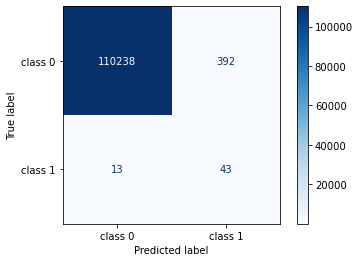

In [39]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [40]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 442543, 1: 201})
Resample dataset shape: Counter({0: 442543, 1: 442543})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [41]:
#Run grid search only on training set using cross-validation
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=RandomizedSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, 
                          n_jobs=-1, scoring='roc_auc', verbose=3)
model2.fit(X_smote,y_smote)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.77 hrs.


In [42]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("Performance :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 100.0}
Performance : 0.9999264377347734
Best Model: LogisticRegression(C=100.0, max_iter=1000, penalty='l1', solver='saga')


In [43]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    110630
     class 1       0.14      0.77      0.24        56

    accuracy                           1.00    110686
   macro avg       0.57      0.88      0.62    110686
weighted avg       1.00      1.00      1.00    110686



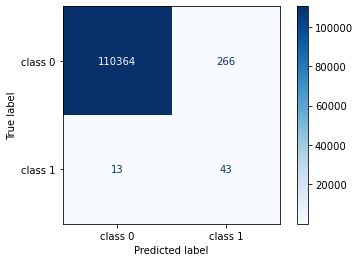

In [44]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-DT)

In [45]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'criterion':['gini','entropy'], 'max_depth' : np.arange(1, 20)}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, n_jobs=-1, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Elapsed time: 0.01 hrs.


In [46]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 17}
accuracy : 0.9999751549224045
Best Model: DecisionTreeClassifier(class_weight='balanced', max_depth=17)


In [47]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    110630
     class 1       0.75      0.16      0.26        56

    accuracy                           1.00    110686
   macro avg       0.87      0.58      0.63    110686
weighted avg       1.00      1.00      1.00    110686



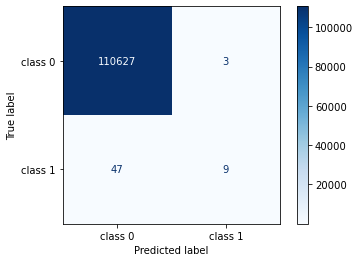

In [48]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [49]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [50]:
# define the undersampling method
oss = OneSidedSelection(random_state=0, n_jobs=-1)
start=perf_counter()
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)
# summarize the new class distribution
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_oss))

Elapsed time: 0.01 hrs.
Original dataset shape: Counter({0: 442543, 1: 201})
Resample dataset shape: Counter({0: 51052, 1: 201})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [51]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'C':np.arange(1, 20)}
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5,n_jobs=-1, verbose=3)
model4.fit(X_oss, y_oss)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Elapsed time: 0.01 hrs.


In [52]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 14}
accuracy : 0.9993951524063089
Best Model: SVC(C=14, class_weight='balanced')


In [53]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    110630
     class 1       0.90      0.77      0.83        56

    accuracy                           1.00    110686
   macro avg       0.95      0.88      0.91    110686
weighted avg       1.00      1.00      1.00    110686



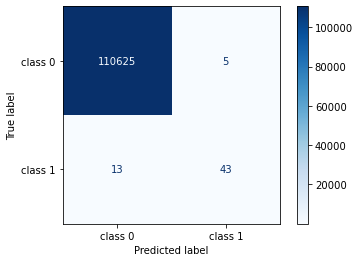

In [54]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [61]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'max_depth': np.arange (2, 10),'n_estimators': np.arange(60, 220, 40), 
              'learning_rate': [0.1, 0.01, 0.05],'gamma' : [0.1, 1, 1.5], 
              'subsample' : [0.8, 0.9, 1.0],
             'colsample_bytree' : [0.3, 0.5, 1.0]}
model5 = RandomizedSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False),
                            parameters, cv=5, n_jobs=-1,scoring='roc_auc',verbose=3)
model5.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.07 hrs.


In [62]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("roc_auc :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'subsample': 1.0, 'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.3}
roc_auc : 0.999993110723352
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=32, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [63]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    110630
     class 1       1.00      0.82      0.90        56

    accuracy                           1.00    110686
   macro avg       1.00      0.91      0.95    110686
weighted avg       1.00      1.00      1.00    110686



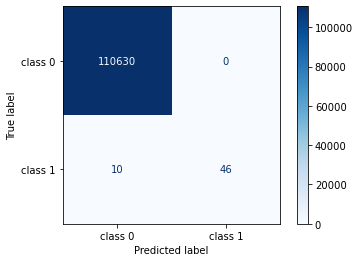

In [64]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [65]:
#save notebook session
import dill
dill.dump_session('session_esc-11.db')
#to restore a notebook session
#dill.load_session('session_esc-11.db')